# Import necessary libraries

In [1]:
from graph import *
import matplotlib.pyplot as plt

# Loading Raw_Graph

## Total nodes and edges

In [2]:
G = build_graph([csv_file1, csv_file2])

Processing type12_type34/type12.csv: 499999it [00:02, 170009.05it/s]
Processing type12_type34/type34.csv: 5000000it [00:38, 130538.32it/s]


In [3]:
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")

Number of nodes: 4162
Number of edges: 5499999


## Test some nodes/edges attributes

In [4]:
nodes = list(G.nodes())

for node in nodes[:5]:
    print(f"Node {node}: {G.nodes[node]}")
    
edges = list(G.edges(keys=True))

for edge in edges[:5]:
    print(f"Edge {edge}: {G.edges[edge]}")

Node 732: {'route_id': 114, 'var_id': 228, 'timestamp': 1616382235.225227, 'node_type': 1, 'latx': 661745.7667923205, 'lngy': 1213351.3022927425}
Node 7617: {'route_id': 114, 'var_id': 228, 'timestamp': 1616382309.2860062, 'node_type': 0, 'latx': 661785.0661056938, 'lngy': 1213227.3944142463}
Node 1387: {'route_id': 114, 'var_id': 228, 'timestamp': 1616382389.5587468, 'node_type': 0, 'latx': 662505.7485116876, 'lngy': 1212848.9131157524}
Node 3650: {'route_id': 114, 'var_id': 228, 'timestamp': 1616382437.557775, 'node_type': 0, 'latx': 662939.8074611276, 'lngy': 1212683.2706257347}
Node 3652: {'route_id': 114, 'var_id': 228, 'timestamp': 1616382491.738523, 'node_type': 0, 'latx': 663417.0206712105, 'lngy': 1212456.1285179683}
Edge (732, 7617, 0): {'weight': (0, 74.06077909469604), 'route_id_x': 114, 'var_id_x': 228, 'route_id_y': 114, 'var_id_y': 228, 'edge_departure': 1616382235.225227, 'edge_arrival': 1616382309.2860062, 'edge_type': 1, 'edge_pos': 0}
Edge (732, 7617, 1): {'weight': 

## Single Shortest Path on Raw_Graph

In [5]:
start_node = list(G.nodes())[0]  
end_node = list(G.nodes())[10] 

distances, paths, edge_keys = dijkstra_raw(G, start_node)

print(f"Shortest path from {start_node} to {end_node}: {paths[end_node]}")
print(f"Total transfers: {distances[end_node][0]}")
print(f"Total time difference: {distances[end_node][1]}")
print(f"Departure time: {distances[end_node][2]}")
print(f"Arrival time: {distances[end_node][3]}")

path = paths[end_node]
for i in range(len(path) - 1):
    edge_key = edge_keys[path[i+1]]
    print(f"Edge from {path[i]} to {path[i+1]}: {edge_key}")

Shortest path from 732 to 3654: [732, 7617, 1387, 7135, 1383, 3649, 3654]
Total transfers: 0
Total time difference: 110.83944773674011
Departure time: 1616382235.225227
Arrival time: 1616382805.995475
Edge from 732 to 7617: 59
Edge from 7617 to 1387: 7
Edge from 1387 to 7135: 32
Edge from 7135 to 1383: 139
Edge from 1383 to 3649: 42
Edge from 3649 to 3654: 3


This is inefficient and not very accurate --> Consider about optimizing graph

# Changing to optimized graph for specific cost

+ Proof for correctness of optimized graph for finding shortest path purpose has been described in the report. 
+ The timestamp in the distances may be misunderstood when not reading the proof first.

## Optimizing graph for APSP cost

In [6]:
G1 = optimize_graph(G)

Optimizing graph: 100%|██████████| 4162/4162 [00:01<00:00, 2423.45it/s]


## Total nodes and edges

In [7]:
print(f"Number of nodes: {G1.number_of_nodes()}")
print(f"Number of edges: {G1.number_of_edges()}")

Number of nodes: 4162
Number of edges: 16629


## Some nodes/edges attributes

In [8]:
nodes = list(G1.nodes())
edges = list(G1.edges())

for node in nodes[:5]:
    print(f"Node {node}: {G1.nodes[node]}")
for edge in edges[:5]:
    print(f"Edge {edge}: {G1.edges[edge]}")

Node 732: {'route_id': 114, 'var_id': 228, 'timestamp': 1616382235.225227, 'node_type': 1, 'latx': 661745.7667923205, 'lngy': 1213351.3022927425}
Node 7617: {'route_id': 114, 'var_id': 228, 'timestamp': 1616382309.2860062, 'node_type': 0, 'latx': 661785.0661056938, 'lngy': 1213227.3944142463}
Node 1387: {'route_id': 114, 'var_id': 228, 'timestamp': 1616382389.5587468, 'node_type': 0, 'latx': 662505.7485116876, 'lngy': 1212848.9131157524}
Node 3650: {'route_id': 114, 'var_id': 228, 'timestamp': 1616382437.557775, 'node_type': 0, 'latx': 662939.8074611276, 'lngy': 1212683.2706257347}
Node 3652: {'route_id': 114, 'var_id': 228, 'timestamp': 1616382491.738523, 'node_type': 0, 'latx': 663417.0206712105, 'lngy': 1212456.1285179683}
Edge (732, 7617): {'weight': (0, 37.345142126083374), 'route_id_x': 114, 'var_id_x': 228, 'route_id_y': 114, 'var_id_y': 228, 'edge_departure': 1616386075.3139164, 'edge_arrival': 1616386112.6590586, 'edge_type': 1, 'edge_pos': 0}
Edge (732, 734): {'weight': (0, 7

## Single shortest path on Optimized_Graph

In [9]:
source = list(G1.nodes())[0]  
des = list(G1.nodes())[15]

distances, paths = dijkstra_one(G1, source)

print(f"Shortest path from {source} to {des}: {paths[des]}")
print(f"Total transfers: {distances[source][0]}")
print(f"Total time difference: {distances[des][1]}")

Shortest path from 732 to 1391: [732, 7617, 1387, 7135, 1383, 3649, 3654, 3655, 3656, 1384, 3657, 1391]
Total transfers: 0
Total time difference: 140.7493975162506


## All shortest paths on optimized graph

### Dijkstra all nodes

In [10]:
all_dist, all_paths = dijkstra_all(G1)

print(f"Shortest path from {source} to {des}: {all_paths[source][des]}")
print(f"Total transfers: {all_dist[source][des][0]}")
print(f"Total time difference: {all_dist[source][des][1]}")

Computing Dijkstra for all nodes: 100%|██████████| 4162/4162 [02:04<00:00, 33.36it/s] 

Shortest path from 732 to 1391: [732, 7617, 1387, 7135, 1383, 3649, 3654, 3655, 3656, 1384, 3657, 1391]
Total transfers: 0
Total time difference: 140.7493975162506


### Saving all distances for efficient retrieval

In [11]:
save_all_shortest_paths(all_dist)

### Loading all distances of shortest paths

In [12]:
all_dist = load_all_shortest_paths()
print(all_dist[source][des])

(0, 140.7493975162506, 1616382235.225227, 1616427006.2883403)


## Calculating top K important stops

### Preprocessing the count (all shortest paths from the source u to v)

In [13]:
all_dist, all_paths, cnt = dijkstra_all_for_counting_importance(G1)

Computing Dijkstra for K importance: 100%|██████████| 4162/4162 [08:50<00:00,  7.84it/s]  


### Counting important scores (Dynamic Programming + Topological Sort)

In [14]:
impo = top_k_importance(G1, cnt, all_dist)
for node in list(G.nodes())[:10]:
    print(f"Node {node} with importance score: {impo[node]}")

Counting top K important stops: 100%|██████████| 4162/4162 [01:19<00:00, 52.40it/s]


Node 732 with importance score: 346163
Node 7617 with importance score: 357330
Node 1387 with importance score: 355712
Node 3650 with importance score: 4558
Node 3652 with importance score: 8232
Node 7135 with importance score: 413327
Node 1383 with importance score: 414173
Node 3649 with importance score: 415019
Node 3651 with importance score: 10290
Node 3653 with importance score: 11136


### Top 10 important stops in the Graph

In [17]:
topTen = sorted(impo.items(), key = lambda x: x[1], reverse = True)[:10]
for node in topTen:
    print(f"Node {node[0]} with importance score: {node[1]}")

Node 7274 with importance score: 3039335
Node 7275 with importance score: 3036659
Node 1239 with importance score: 2961934
Node 174 with importance score: 2821501
Node 169 with importance score: 2768236
Node 7273 with importance score: 2602078
Node 27 with importance score: 2515721
Node 1115 with importance score: 2369526
Node 35 with importance score: 2305607
Node 7276 with importance score: 2304752


### Saving top 10 most important stops to file

In [18]:
filename = "output/top_ten_impo.txt"

with open(filename, 'w') as file:
    file.write('Top 10 Most Important Stops with Attributes\n')
    file.write('---------------------------------------------\n')
    for node, importance in topTen:
        attributes = G.nodes[node]  
        
        attributes_str = ', '.join(f"{key}={value}" for key, value in attributes.items())
        
        file.write(f"Node {node} with importance score: {importance}\n")
        file.write(f"Attributes: {attributes_str}\n")
        file.write('-----------------------------\n')

## Distribution of K important stops

### Scattering distribution for all stops

In [100]:
def scatter_distribution(impo):
    nodes = list(impo.keys())  # Stop IDs
    scores = list(impo.values())  # Important scores

    plt.figure(figsize=(12, 8))
    plt.scatter(nodes, scores, color='blue', alpha=0.5)

    plt.xlabel('Stop ID', fontsize=14)
    plt.ylabel('Important Score', fontsize=14)
    plt.title('Scatter Plot of Important Scores', fontsize=16)

    plt.tight_layout()
    plt.show()

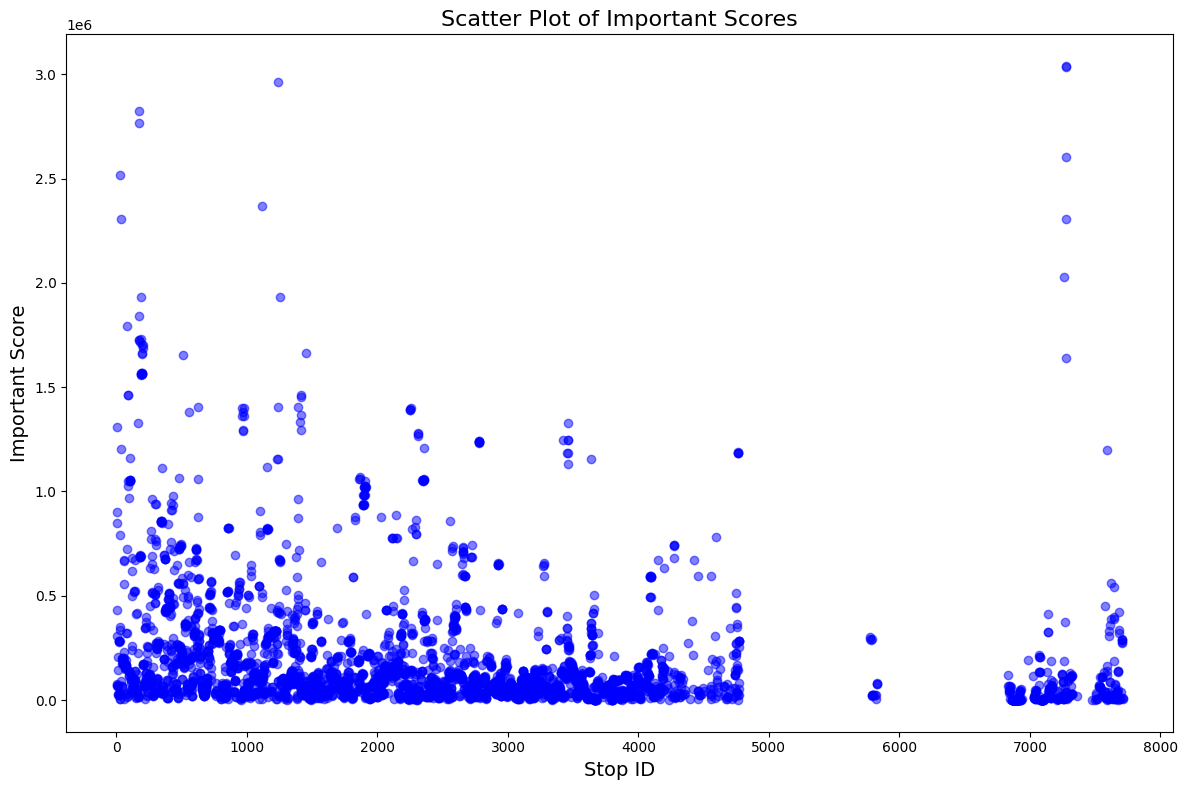

In [101]:
scatter_distribution(impo)

### Distribution's figure of top 10 important stops

In [97]:
def top_K_line_distribution(topTen):
    top_nodes = [node for node, score in reversed(topTen)]
    top_scores = [score for node, score in reversed(topTen)]

    plt.figure(figsize=(12, 6))
    plt.plot(range(len(top_nodes)), top_scores, color="red")
    plt.xticks(range(len(top_nodes)), top_nodes)
    
    plt.title("Top 10th most important stops")
    plt.xlabel("Stop ID")
    plt.ylabel("Important Scores")
    
    plt.tight_layout()
    
    plt.show()
    
def top_K_bar_distribution(topTen):
    top_nodes = [node for node, score in reversed(topTen)]
    top_scores = [score for node, score in reversed(topTen)]

    plt.figure(figsize=(12, 6))
    plt.bar(range(len(top_nodes)), top_scores, color="green")
    plt.xticks(range(len(top_nodes)), top_nodes)
    
    plt.title("Top 10th most important stops")
    plt.xlabel("Stop ID")
    plt.ylabel("Important Scores")
    
    plt.tight_layout()
    
    plt.show()

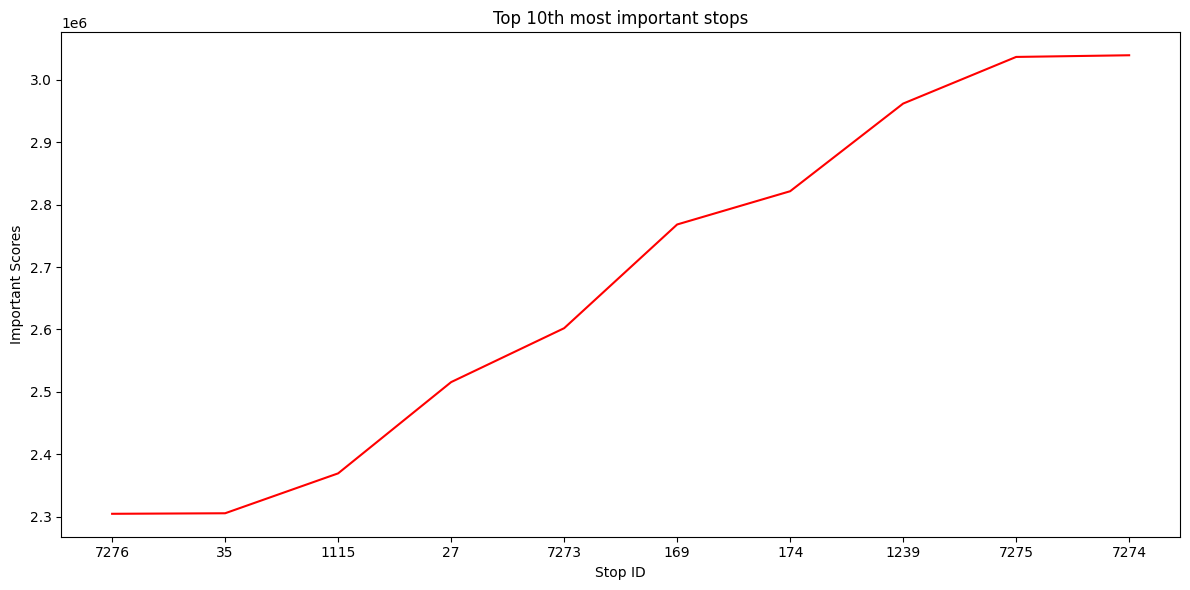

In [98]:
top_K_line_distribution(topTen)

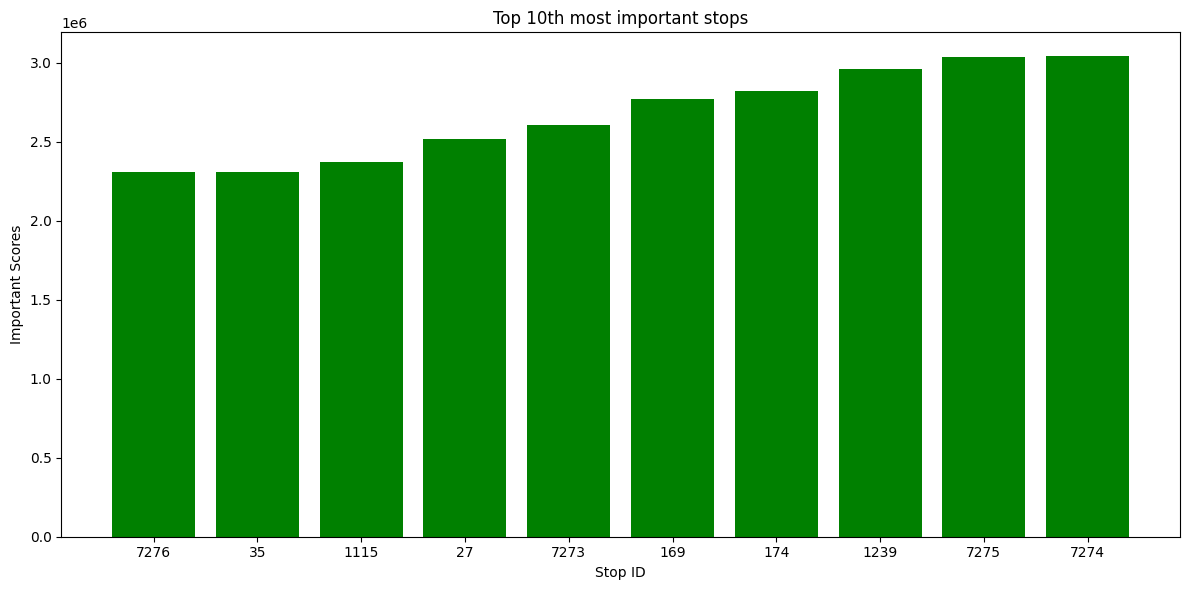

In [99]:
top_K_bar_distribution(topTen)